In [1]:
import nilearn.plotting as niplot
from neuromaps import transforms
import numpy as np
from surfplot import Plot
from neuromaps.datasets import fetch_fslr
import scipy.io
from brainspace.utils.parcellation import map_to_labels
from brainspace.datasets import load_parcellation
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from matplotlib.colors import rgb_to_hsv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Calculating C (colorcodes for the nodes)
def get_hues(mean_control_first,mean_control_second,mean_control_third):
    norm_1 = mpl.colors.Normalize(vmin=mean_control_first.min(), vmax=mean_control_first.max())
    cmap_1 = cm.Reds
    map_1  = cm.ScalarMappable(norm=norm_1, cmap=cmap_1)
    
    norm_2 = mpl.colors.Normalize(vmin=mean_control_second.min(), vmax=mean_control_second.max())
    cmap_2 = cm.Greens
    map_2  = cm.ScalarMappable(norm=norm_2, cmap=cmap_2)
    
    norm_3 = mpl.colors.Normalize(vmin=mean_control_third.max(), vmax=mean_control_third.min() )
    cmap_3 = cm.Blues
    map_3  = cm.ScalarMappable(norm=norm_3, cmap=cmap_3)
    
    c = np.ones(map_1.to_rgba(mean_control_first).shape)
    
    a = mean_control_second.copy()
    a = a - a.min() 
    a = a / a.max()
    c[:,1] = a
    
    a = mean_control_third.copy()
    a = a - a.min() 
    a = a / a.max()
    c[:,2] = a
    
    a = mean_control_first.copy()
    a = a - a.min() 
    a = a / a.max()
    c[:,0] = a
    c[:,1] = c[:,1] * ((a - 1) * -1)
    c[:,2] = c[:,2] * ((a - 1) * -1)
    return c
    #d = np.ones(map_1.to_rgba(grad1).shape) 
    #d[:, 0:3] = np.array(c_long).transpose

def rgb_row_to_grayscale(rgb_row):
    return 0.299 * rgb_row[0] + 0.587 * rgb_row[1] + 0.114 * rgb_row[2]


In [3]:
surfaces = fetch_fslr(density='32k')
lh, rh = surfaces['inflated']
labeling = load_parcellation('schaefer', scale=400, join=True)

## Effect of lag


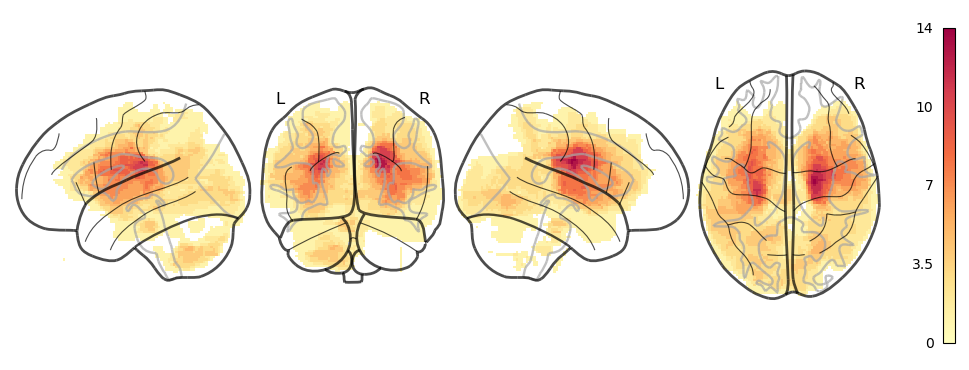

In [14]:
niplot.plot_glass_brain('../sum.nii.gz', black_bg=False, cmap='Spectral_r', display_mode='lyrz', colorbar=True)
#niplot.plot_glass_brain('../sum.nii.gz', black_bg=False, cmap='Spectral_r', display_mode='lyrz', colorbar=True, output_file='/home/koba/Desktop/Stroke/figures/revision/lesion_locations_a.svg')

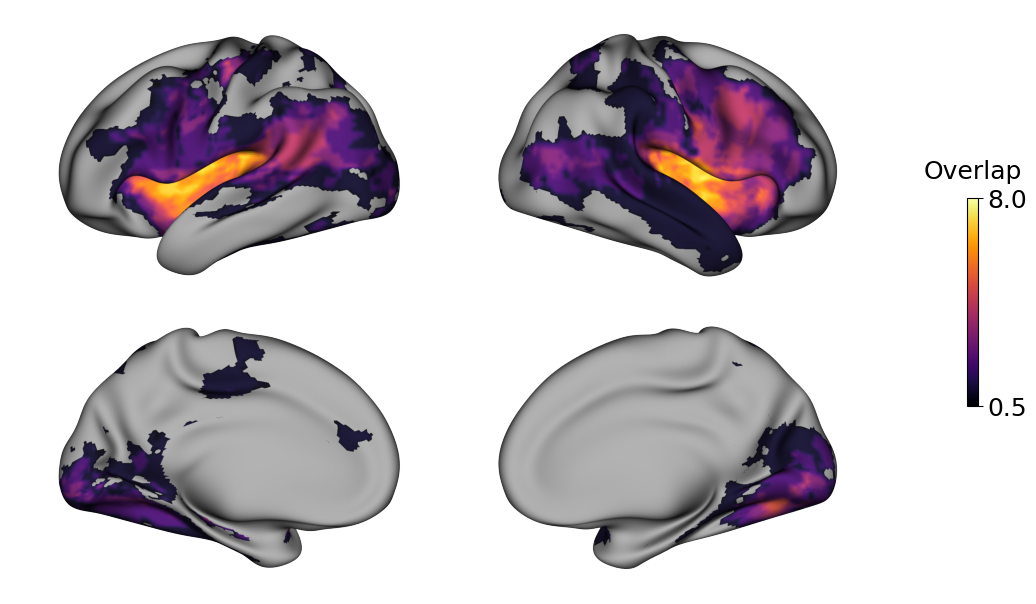

In [5]:
a=transforms.mni152_to_fslr('../sum.nii.gz')

# Assuming gifti_objects is a tuple containing two GiftiImage objects
gifti_object_left, gifti_object_right = a

# Extract data arrays from the GiftiImage objects
data_left = gifti_object_left.darrays[0].data
data_right = gifti_object_right.darrays[0].data


merged_data = np.concatenate((data_left, data_right), axis=0)

empty=np.zeros_like(merged_data)
empty[merged_data>0.5]=merged_data[merged_data>0.5]

p = Plot(lh, rh, views=['lateral','medial'],size=(1200,800), zoom=1.5)
p.add_layer(empty, cbar=True, cmap='inferno',cbar_label='Overlap')
kws = {'location': 'right', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 18,}
fig = p.build(cbar_kws=kws)
fig.savefig("/home/koba/Desktop/Stroke/figures/revision/lesion_locations_b.svg")

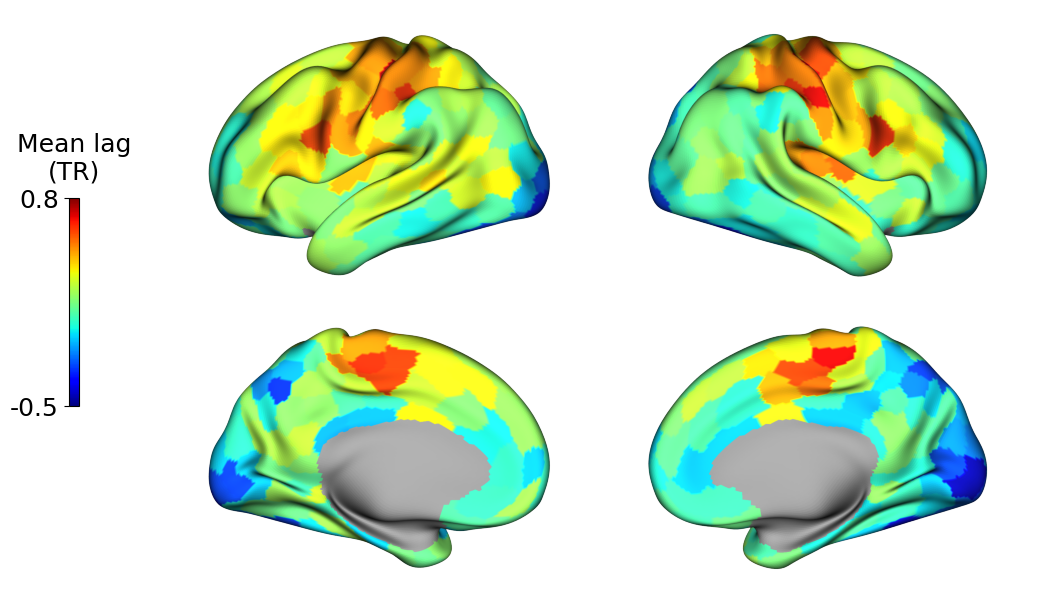

In [24]:
lags = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/lags1.mat')
controlmean=lags['lagc']
controlmean_mesh = map_to_labels(np.squeeze(controlmean), labeling, mask=labeling != 0, fill=np.nan)

strokemean=lags['lags']
strokemean_mesh = map_to_labels(np.squeeze(strokemean), labeling, mask=labeling != 0, fill=np.nan)


p = Plot(lh, rh, views=['lateral','medial'],size=(1200,800))
p.add_layer(controlmean_mesh, cbar=True, cmap='jet',cbar_label='Mean lag\n(TR)', color_range=[-0.5,0.8], )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 18 }
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/after_lag_c.svg')


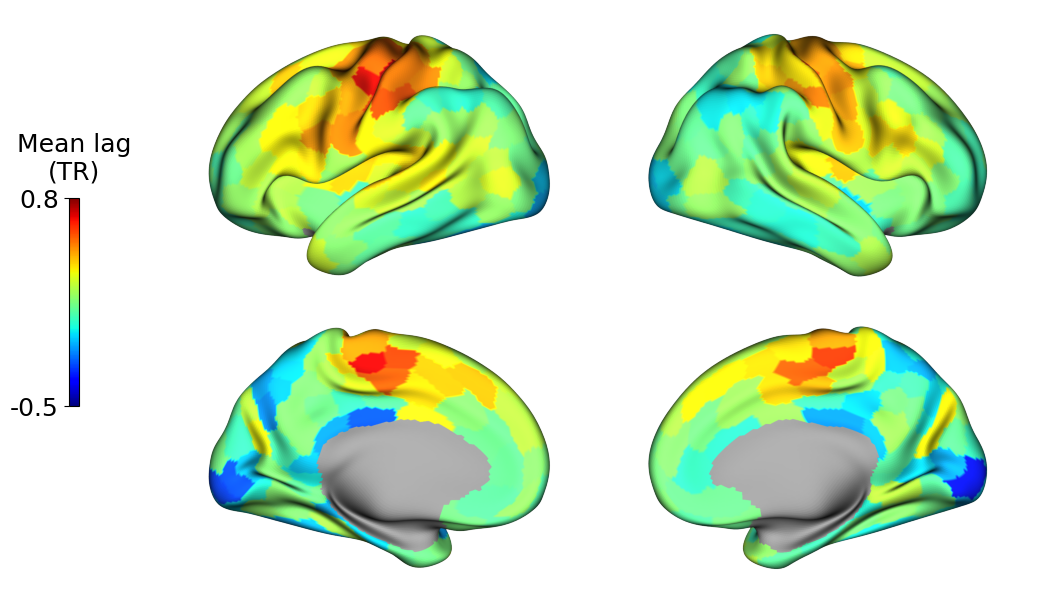

In [26]:
p = Plot(lh, rh, views=['lateral','medial'],size=(1200,800))
p.add_layer(strokemean_mesh, cbar=True, cmap='jet',cbar_label='Mean lag\n(TR)' , color_range=[-0.5,0.8] )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 18, }
fig = p.build(cbar_kws=kws)

fig.savefig('/home/koba/Desktop/Stroke/figures/revision/after_lag_d.svg')


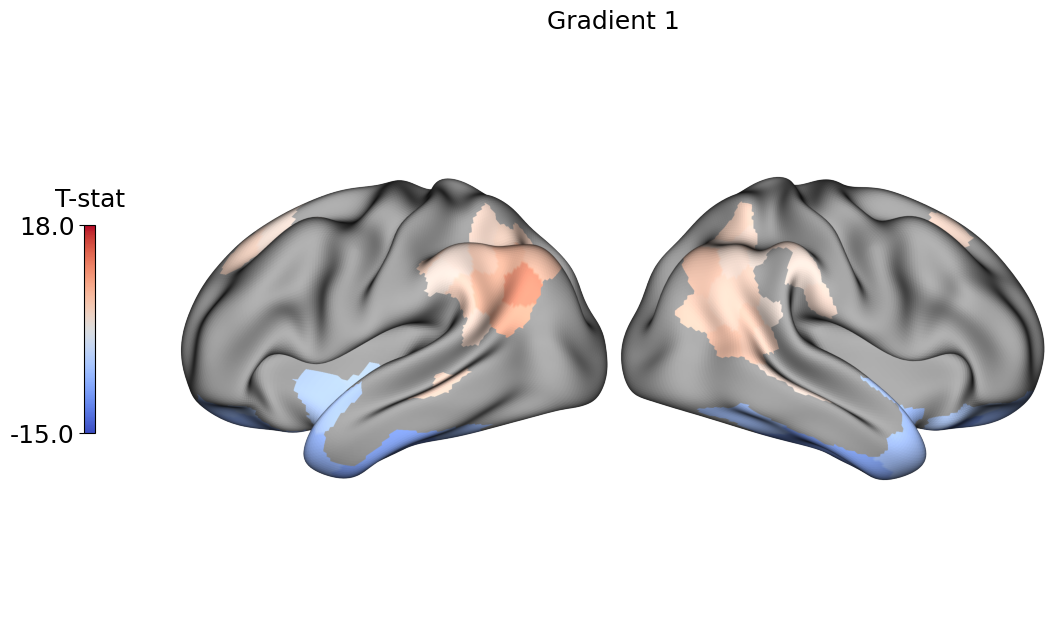

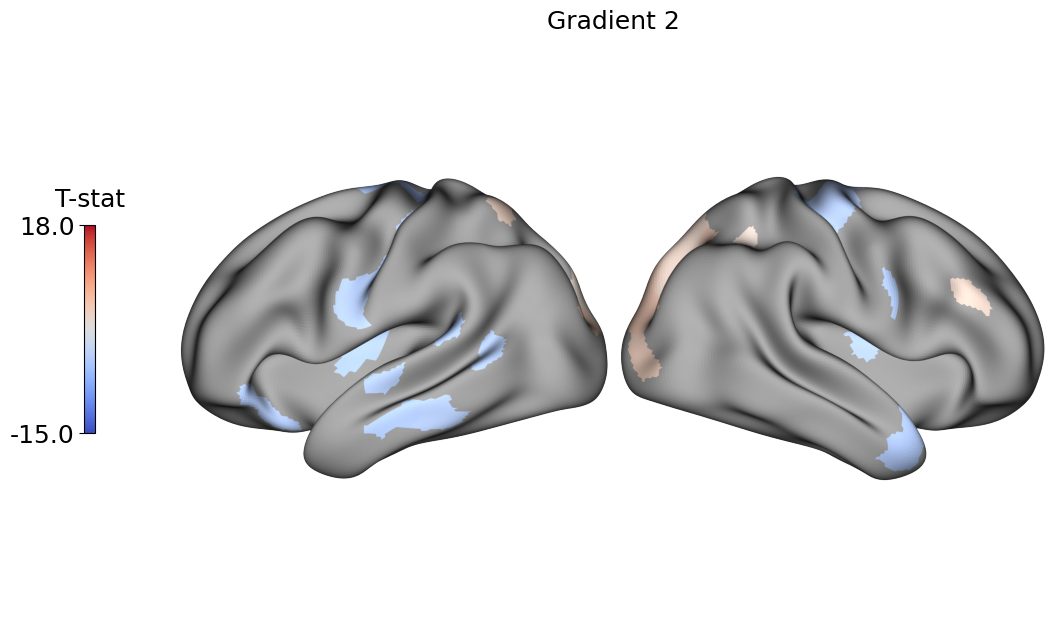

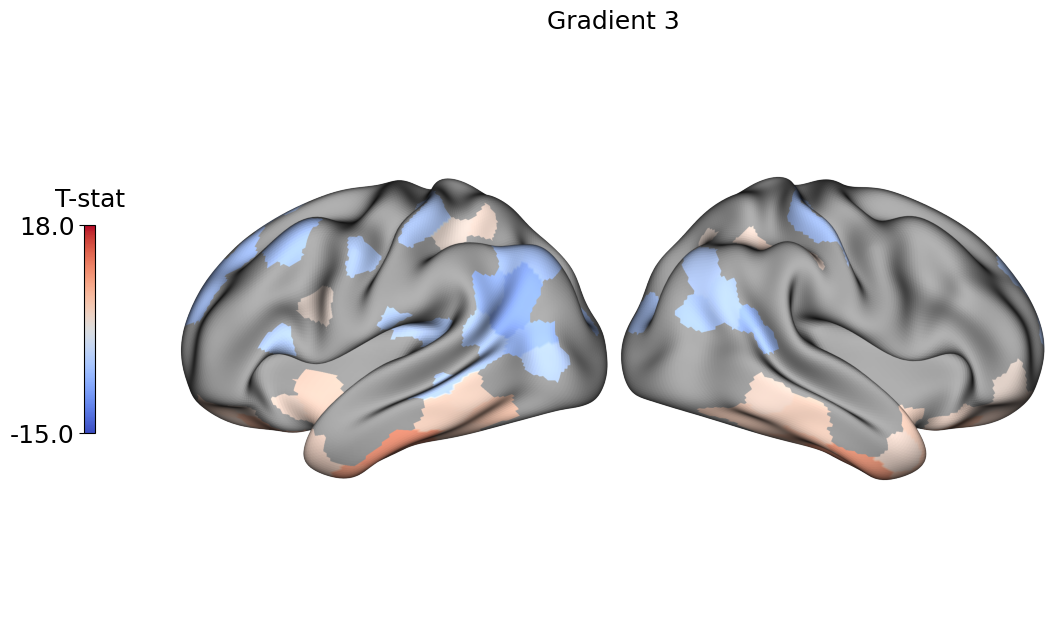

In [28]:

controlbeforeafter1=lags['f1'][:,0]
controlbeforeafter1_mesh = map_to_labels(np.squeeze(controlbeforeafter1), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh, views=['lateral'], zoom=1.25, size=(1200,800))
p.add_layer(controlbeforeafter1_mesh, cbar=True, cmap='coolwarm',cbar_label='T-stat', color_range=[-15,18])
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 18, }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Gradient 1', fontsize=18)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/fig6_a.svg')

controlbeforeafter2=lags['f1'][:,1]
controlbeforeafter2_mesh = map_to_labels(np.squeeze(controlbeforeafter2), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh, views=['lateral'], zoom=1.25, size=(1200,800))
p.add_layer(controlbeforeafter2_mesh, cbar=True, cmap='coolwarm',cbar_label='T-stat' , color_range=[-15,18])
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 18, }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Gradient 2', fontsize=18)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/fig6_b.svg')


controlbeforeafter3=lags['f1'][:,2]
controlbeforeafter3_mesh = map_to_labels(np.squeeze(controlbeforeafter3), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh, views=['lateral'], zoom=1.25, size=(1200,800))
p.add_layer(controlbeforeafter3_mesh, cbar=True, cmap='coolwarm',cbar_label='T-stat', color_range=[-15,18] )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 18 }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Gradient 3', fontsize=18)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/fig6_c.svg')


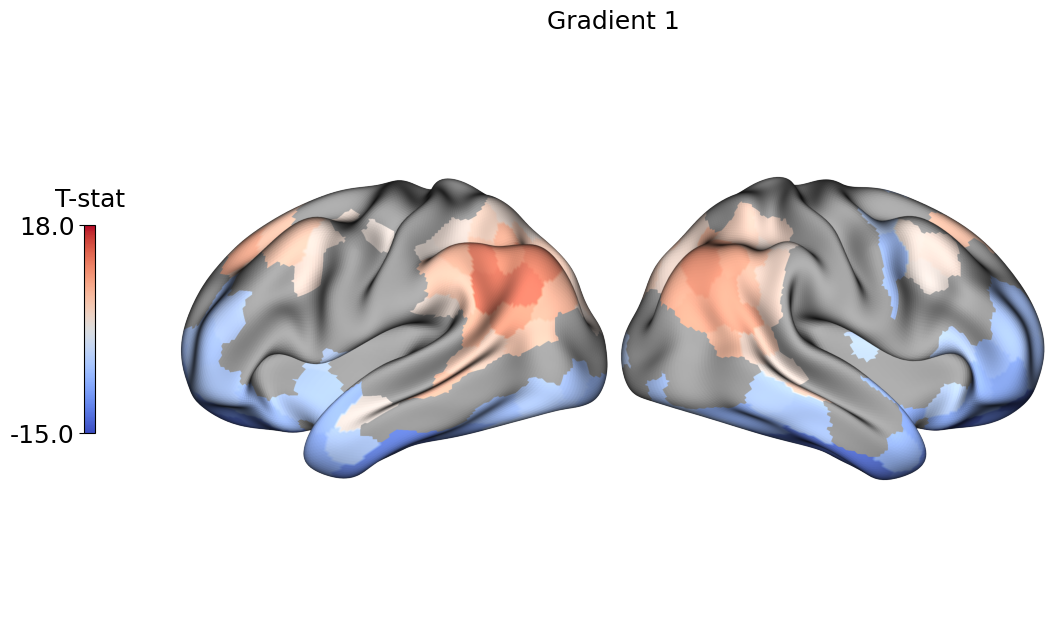

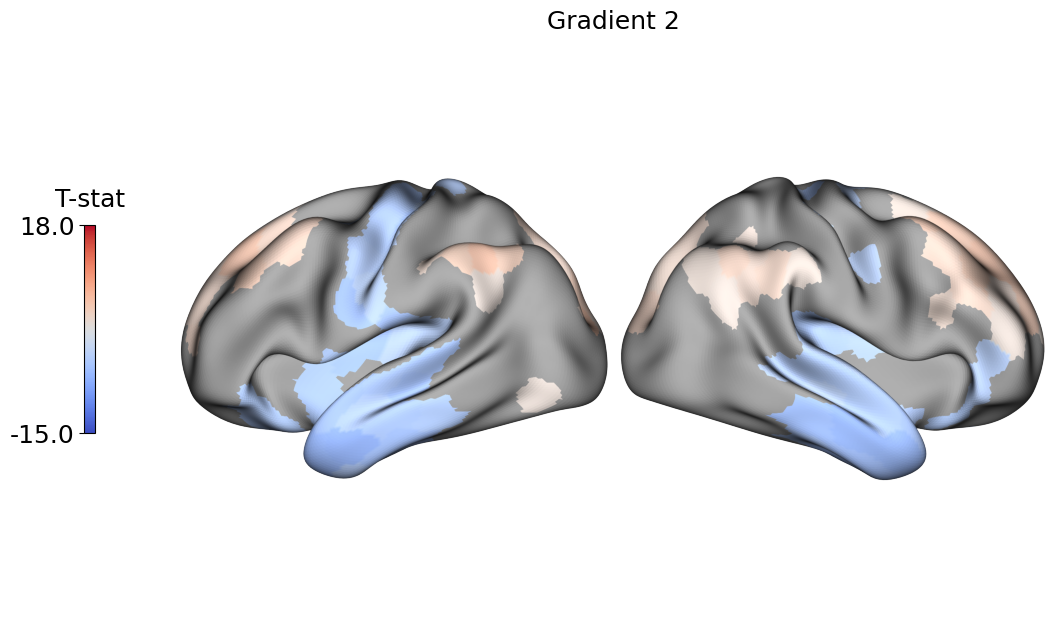

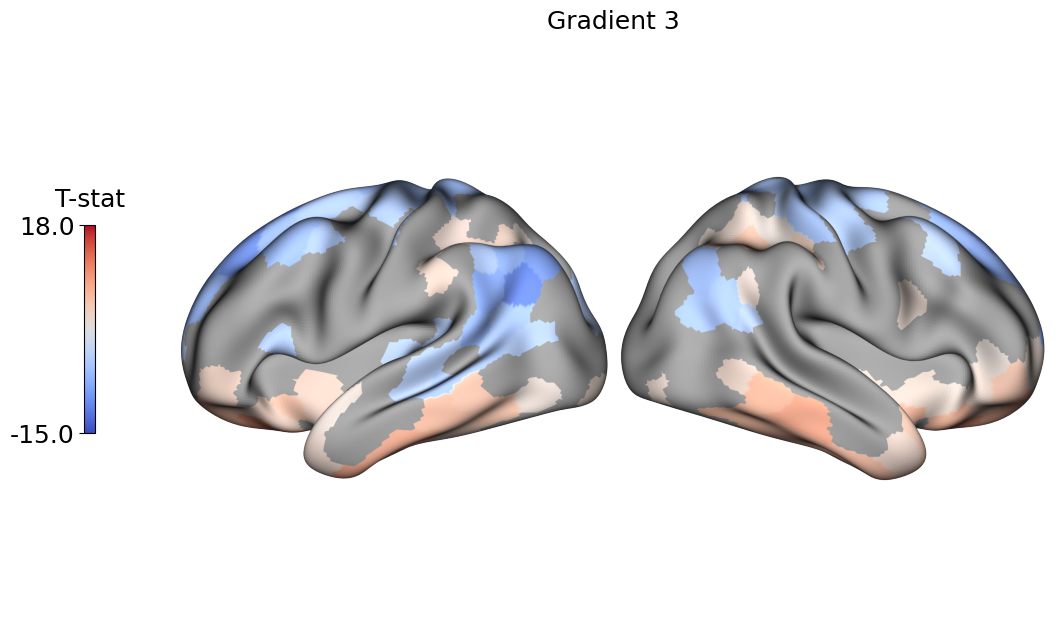

In [29]:

strokebeforeafter1=lags['f2'][:,0]
strokebeforeafter1_mesh = map_to_labels(np.squeeze(strokebeforeafter1), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh, views=['lateral'], zoom=1.25, size=(1200,800))
p.add_layer(strokebeforeafter1_mesh, cbar=True, cmap='coolwarm',cbar_label='T-stat' , color_range=[-15,18])
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 18, }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Gradient 1', fontsize=18)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/fig6_d.svg')


strokebeforeafter2=lags['f2'][:,1]
strokebeforeafter2_mesh = map_to_labels(np.squeeze(strokebeforeafter2), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh, views=['lateral'], zoom=1.25, size=(1200,800))
p.add_layer(strokebeforeafter2_mesh, cbar=True, cmap='coolwarm',cbar_label='T-stat', color_range=[-15,18] )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 18, }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Gradient 2', fontsize=18)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/fig6_e.svg')

strokebeforeafter3=lags['f2'][:,2]
strokebeforeafter3_mesh = map_to_labels(np.squeeze(strokebeforeafter3), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh, views=['lateral'], zoom=1.25, size=(1200,800))
p.add_layer(strokebeforeafter3_mesh, cbar=True, cmap='coolwarm',cbar_label='T-stat' , color_range=[-15,18])
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 18, }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Gradient 3', fontsize=18)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/fig6_f.svg')


## Gradients

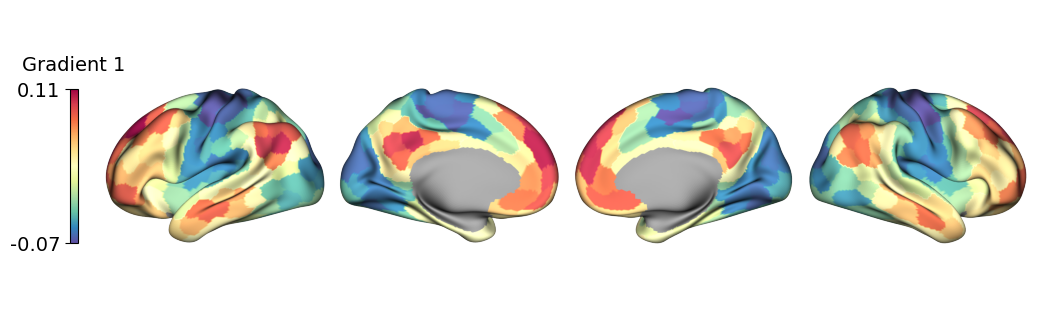

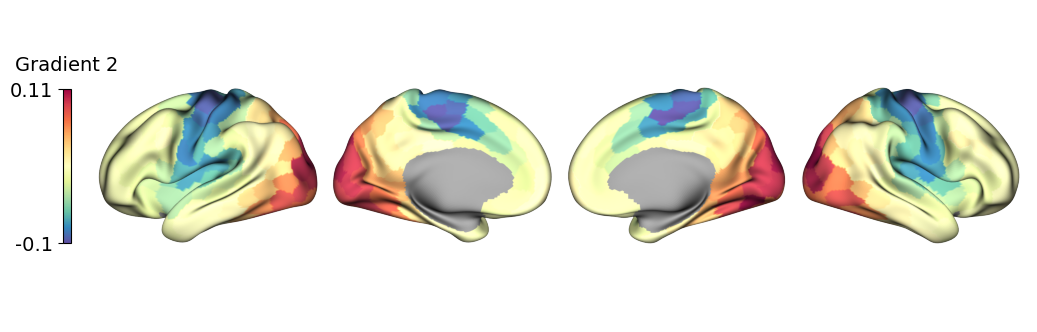

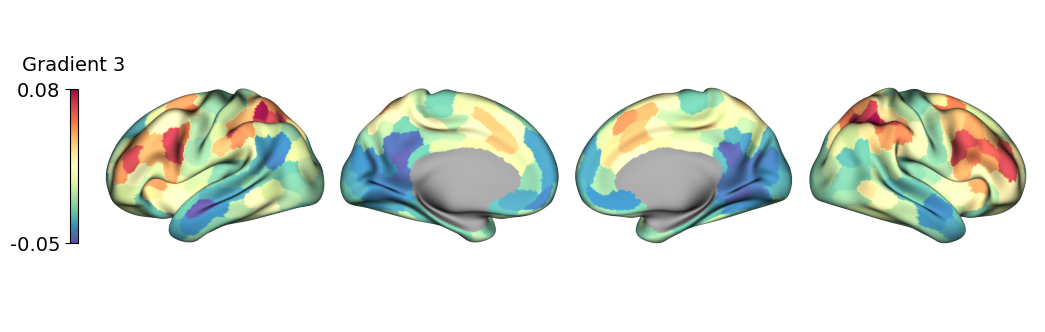

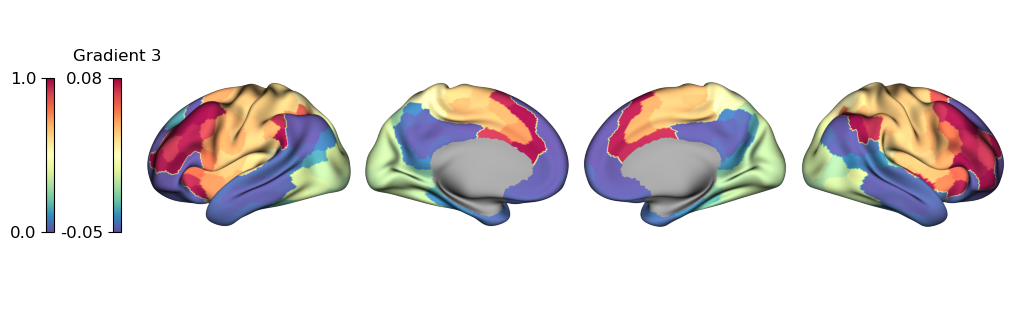

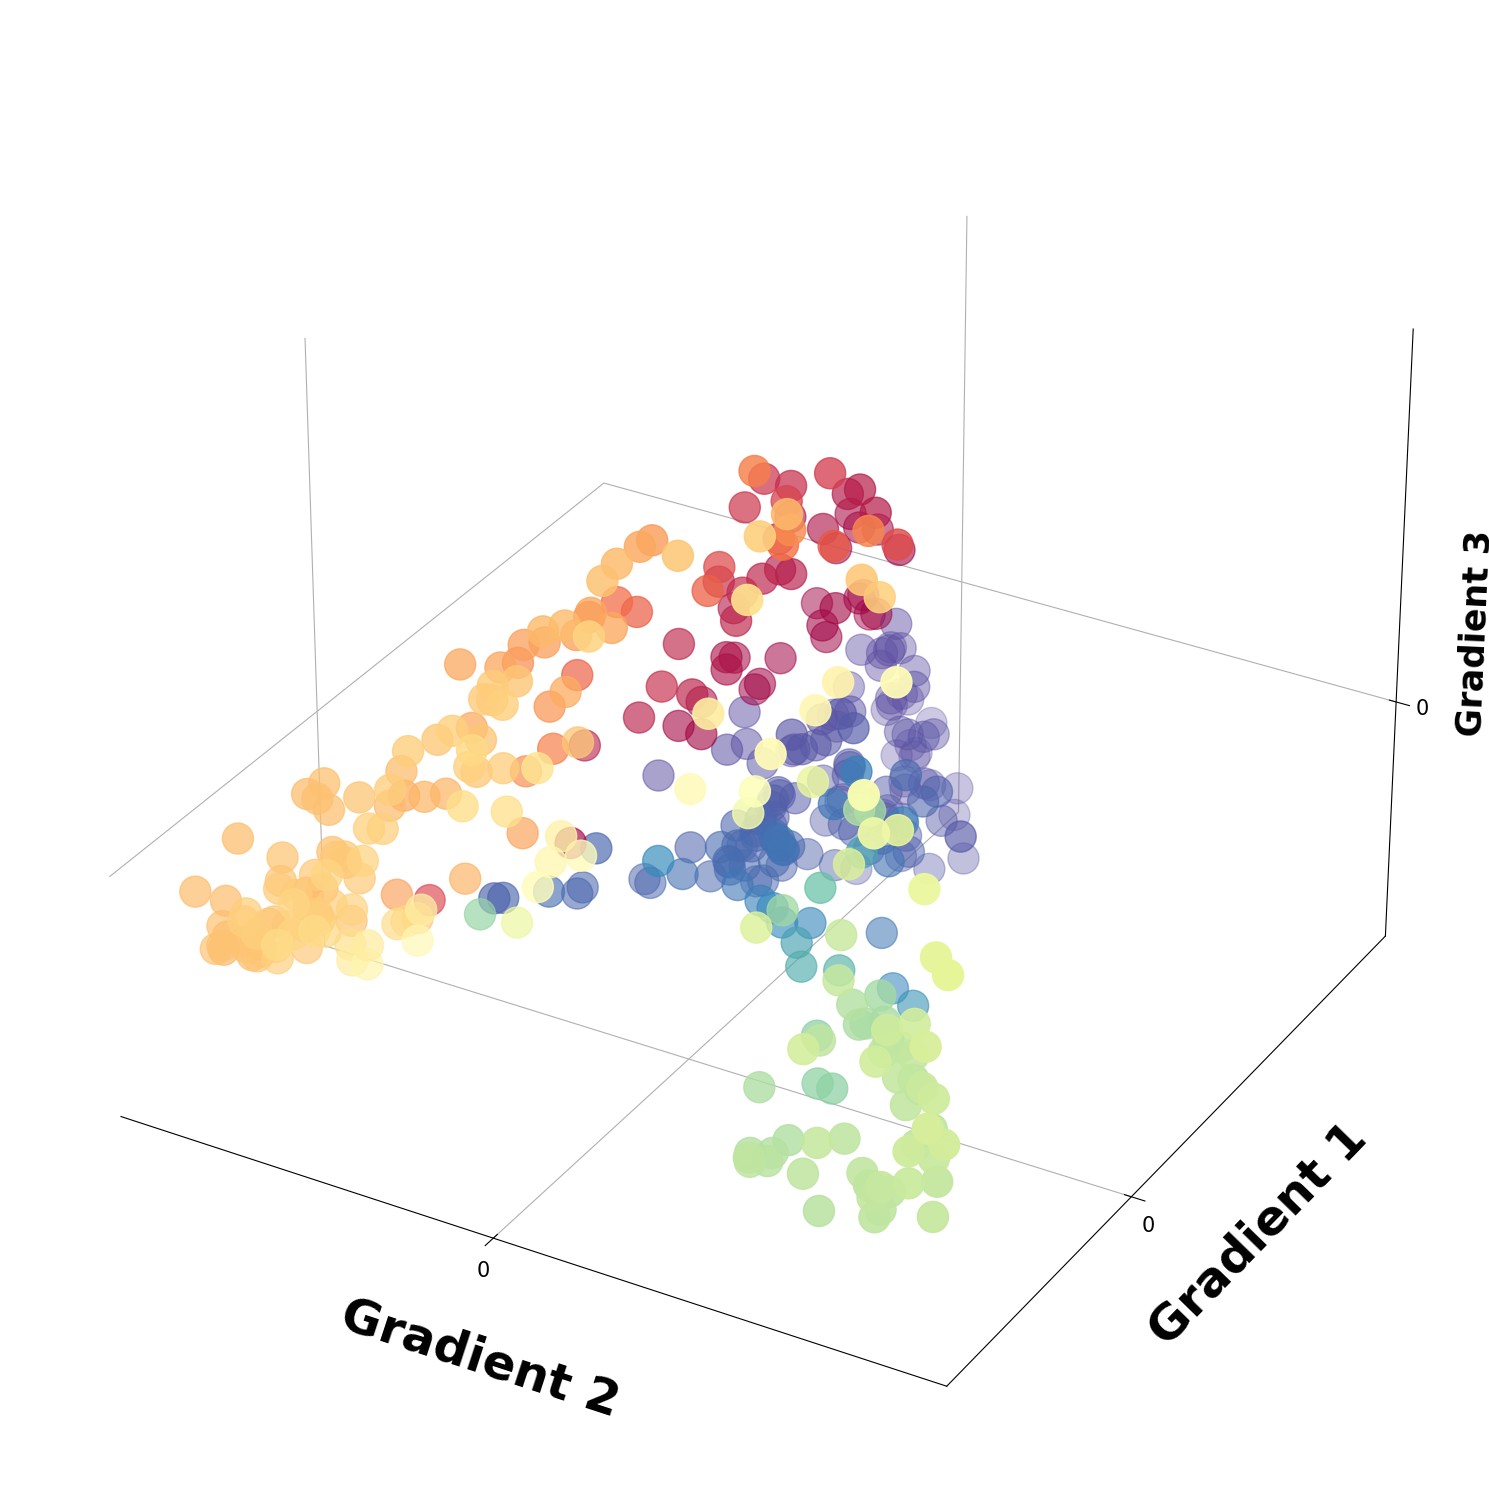

In [70]:
# Load the gradients (400x10x130 matrix)
before_aligned = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/before_aligned.mat')
before_aligned=before_aligned['before_aligned']

# Map the 400 values to size of meshes
control_first=before_aligned[:,0,0:25]
mean_control_first=control_first.mean(axis=1)

control_second=before_aligned[:,1,0:25]
mean_control_second=control_second.mean(axis=1)

control_third=before_aligned[:,2,0:25]
mean_control_third=control_third.mean(axis=1)
grad1 = map_to_labels(mean_control_first, labeling, mask=labeling != 0, fill=np.nan)
grad2 = map_to_labels(mean_control_second, labeling, mask=labeling != 0, fill=np.nan)
grad3 = map_to_labels(mean_control_third, labeling, mask=labeling != 0, fill=np.nan)


c=get_hues(mean_control_first,mean_control_second,mean_control_third)
rgb_matrix = c[:,0:3]
hsv_matrix = rgb_to_hsv(rgb_matrix)
hue_values = hsv_matrix[:, 0]

p = Plot(lh, rh, size=(1200, 400), zoom=1.2, layout='row',mirror_views=True)
p.add_layer(grad1, cbar=True, cmap='Spectral_r', cbar_label='Gradient 1' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 14, 'shrink':0.4,'pad':0.02}
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/g1_before.svg')



p = Plot(lh, rh, size=(1200, 400), zoom=1.2, layout='row',mirror_views=True)
p.add_layer(grad2, cbar=True, cmap='Spectral_r', cbar_label='Gradient 2' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 14, 'shrink':0.4,'pad':0.02}
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/g2_before.svg')


p = Plot(lh, rh, size=(1200, 400), zoom=1.2, layout='row',mirror_views=True)
p.add_layer(grad3, cbar=True, cmap='Spectral_r', cbar_label='Gradient 3' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 14, 'shrink':0.4,'pad':0.02}
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/g3_before.svg')

hue = map_to_labels(hue_values, labeling, mask=labeling != 0, fill=np.nan)

p.add_layer(hue, cbar=True, cmap='Spectral_r', cbar_label=' ' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, 'shrink':0.4,'pad':0.02}
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/hues_before.svg')


fig = plt.figure(figsize=(15, 15), facecolor='w')
ax = fig.add_subplot(111, projection='3d')

# Set the background color of the 3D plot
ax.patch.set_facecolor('white')

# Scatter plot
sc = ax.scatter(mean_control_second, mean_control_first, mean_control_third,
                c=hue_values, cmap='Spectral_r', s=500)

# Set axis limits
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# Set ticks to only show 0
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_zticks([0])

# Set axis labels with proper spacing and font sizes
yLabel = ax.set_ylabel('\nGradient 1', linespacing=3.1, fontsize=35, weight='bold')
xLabel = ax.set_xlabel('\nGradient 2', linespacing=3.2, fontsize=35, weight='bold')
zLabel = ax.set_zlabel('\nGradient 3', fontsize=25, weight='bold')

# Set the distance between the camera and the plot
ax.dist = 10

# Increase tick label size
ax.tick_params(labelsize=15)

# Show plot
plt.tight_layout()
plt.show()
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/scatter_before.svg')


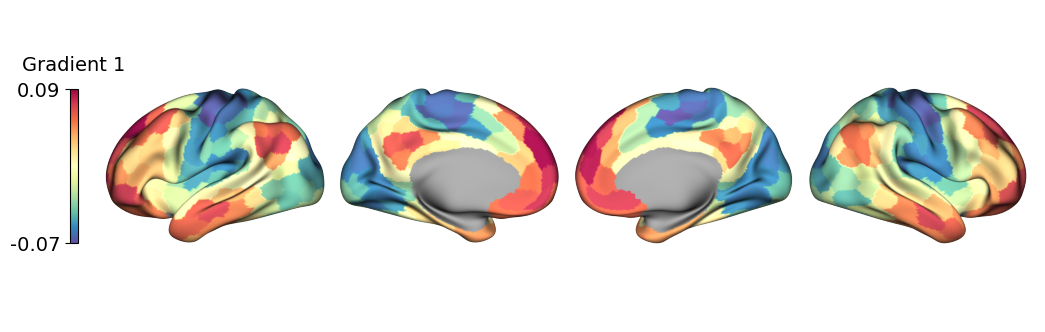

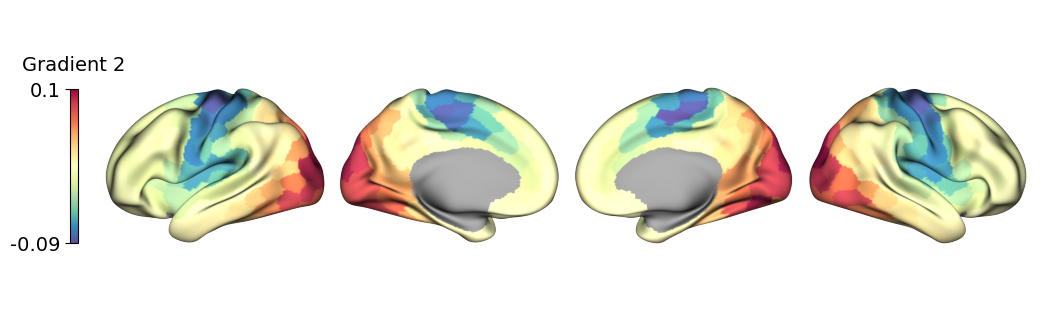

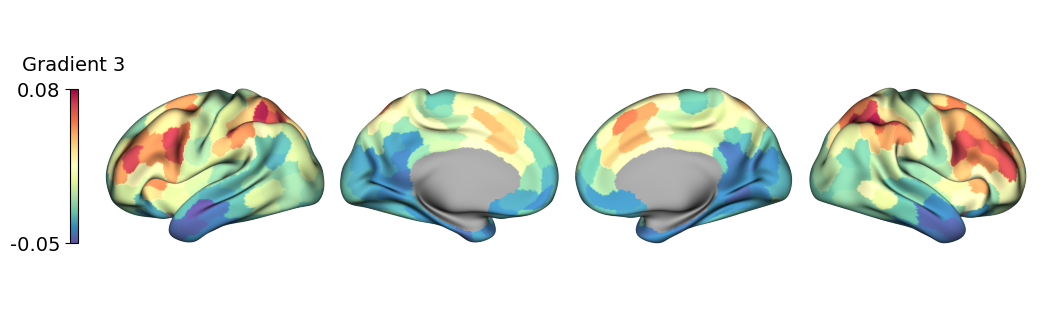

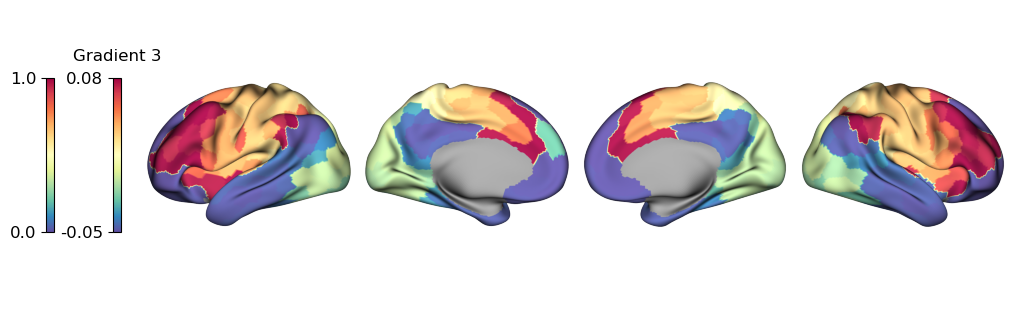

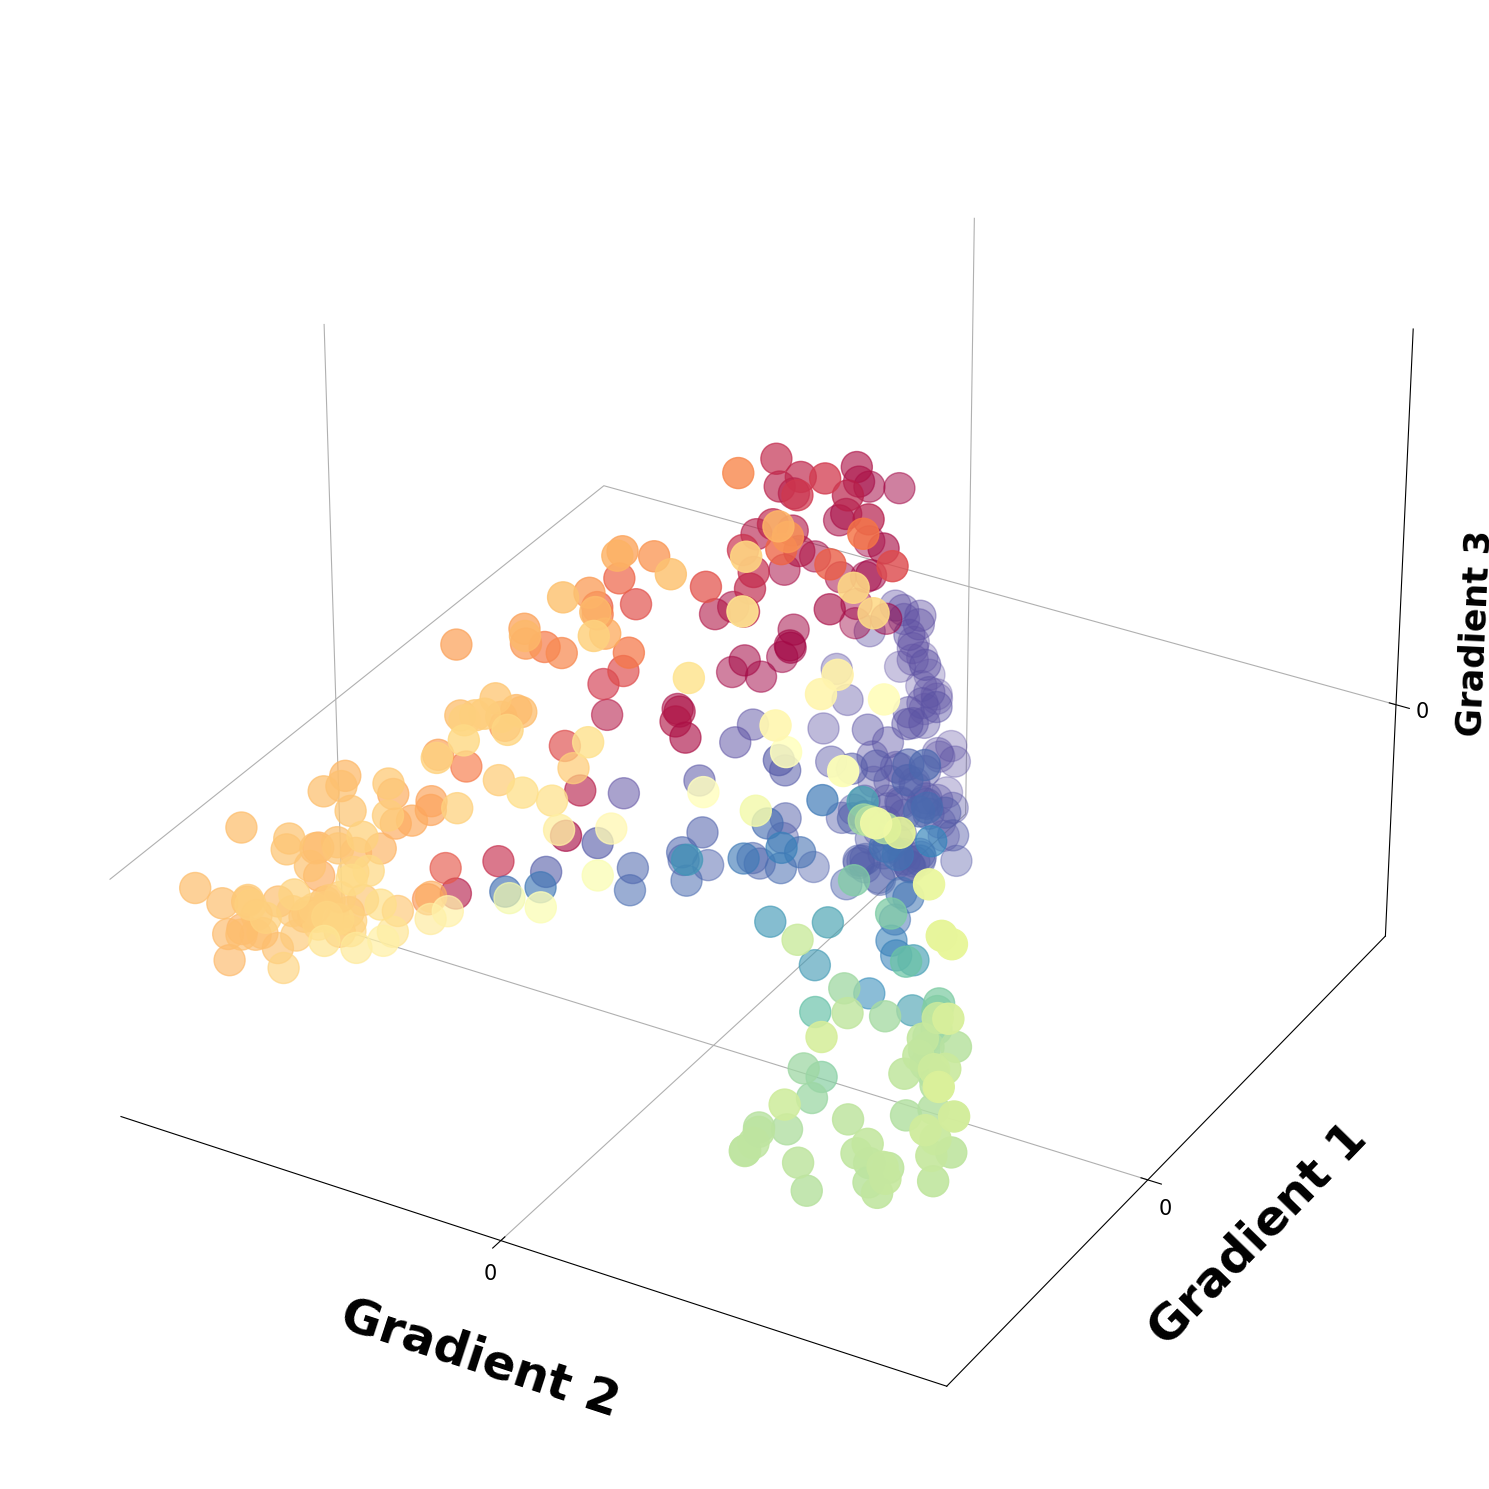

In [71]:
# Load the gradients (400x10x130 matrix)
after_aligned = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/after_aligned.mat')
after_aligned=after_aligned['after_aligned']

# Map the 400 values to size of meshes
control_first=after_aligned[:,0,0:25]
mean_control_first=control_first.mean(axis=1)

control_second=after_aligned[:,1,0:25]
mean_control_second=control_second.mean(axis=1)

control_third=after_aligned[:,2,0:25]
mean_control_third=control_third.mean(axis=1)
grad1 = map_to_labels(mean_control_first, labeling, mask=labeling != 0, fill=np.nan)
grad2 = map_to_labels(mean_control_second, labeling, mask=labeling != 0, fill=np.nan)
grad3 = map_to_labels(mean_control_third, labeling, mask=labeling != 0, fill=np.nan)


c=get_hues(mean_control_first,mean_control_second,mean_control_third)
rgb_matrix = c[:,0:3]
hsv_matrix = rgb_to_hsv(rgb_matrix)
hue_values = hsv_matrix[:, 0]

p = Plot(lh, rh, size=(1200, 400), zoom=1.2, layout='row',mirror_views=True)
p.add_layer(grad1, cbar=True, cmap='Spectral_r', cbar_label='Gradient 1' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 14, 'shrink':0.4,'pad':0.02}
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/g1_after.svg')



p = Plot(lh, rh, size=(1200, 400), zoom=1.2, layout='row',mirror_views=True)
p.add_layer(grad2, cbar=True, cmap='Spectral_r', cbar_label='Gradient 2' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 14, 'shrink':0.4,'pad':0.02}
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/g2_after.svg')


p = Plot(lh, rh, size=(1200, 400), zoom=1.2, layout='row',mirror_views=True)
p.add_layer(grad3, cbar=True, cmap='Spectral_r', cbar_label='Gradient 3' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 14, 'shrink':0.4,'pad':0.02}
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/g3_after.svg')

hue = map_to_labels(hue_values, labeling, mask=labeling != 0, fill=np.nan)

p.add_layer(hue, cbar=True, cmap='Spectral_r', cbar_label=' ' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, 'shrink':0.4,'pad':0.02}
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/hues_after.svg')


fig = plt.figure(figsize=(15, 15), facecolor='w')
ax = fig.add_subplot(111, projection='3d')

# Set the background color of the 3D plot
ax.patch.set_facecolor('white')

# Scatter plot
sc = ax.scatter(mean_control_second, mean_control_first, mean_control_third,
                c=hue_values, cmap='Spectral_r', s=500)

# Set axis limits
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# Set ticks to only show 0
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_zticks([0])

# Set axis labels with proper spacing and font sizes
yLabel = ax.set_ylabel('\nGradient 1', linespacing=3.1, fontsize=35, weight='bold')
xLabel = ax.set_xlabel('\nGradient 2', linespacing=3.2, fontsize=35, weight='bold')
zLabel = ax.set_zlabel('\nGradient 3', fontsize=25, weight='bold')

# Set the distance between the camera and the plot
ax.dist = 10

# Increase tick label size
ax.tick_params(labelsize=15)

# Show plot
plt.tight_layout()
plt.show()
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/scatter_after.svg')


## EDfunc difference

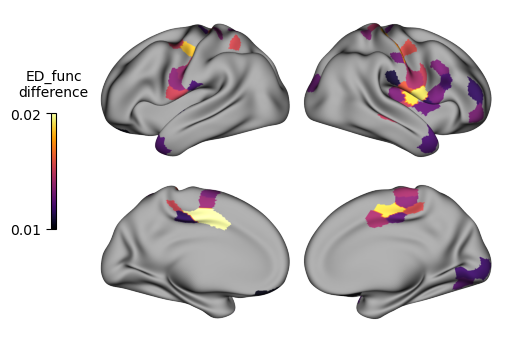

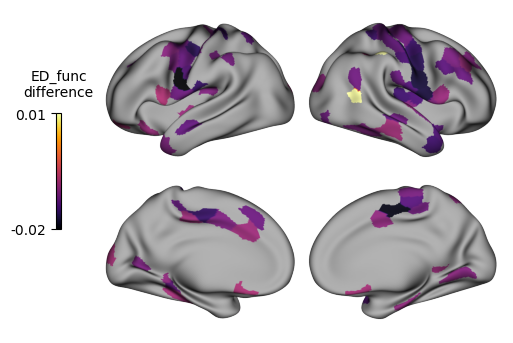

In [14]:
edfunc = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/edfunc_before.mat')
dif1=edfunc['ans']
dif_mesh = map_to_labels(np.squeeze(dif1), labeling, mask=labeling != 0, fill=np.nan)
dif_mesh=dif_mesh*-1
p = Plot(lh, rh, views=['lateral','medial'])
p.add_layer(dif_mesh, cbar=True, cmap='inferno',cbar_label='ED_func\ndifference' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('', pad=-5)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/edfunc3d_b_before.svg')

edfunc = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/edfunc_after.mat')
dif1=edfunc['dd2']
dif_mesh = map_to_labels(np.squeeze(dif1), labeling, mask=labeling != 0, fill=np.nan)
dif_mesh=dif_mesh*-1
p = Plot(lh, rh, views=['lateral','medial'])
p.add_layer(dif_mesh, cbar=True, cmap='inferno',cbar_label='ED_func\ndifference' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('', pad=-5)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/edfunc3d_b_after.svg')



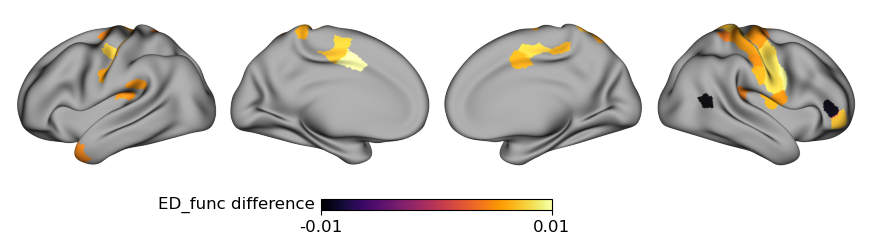

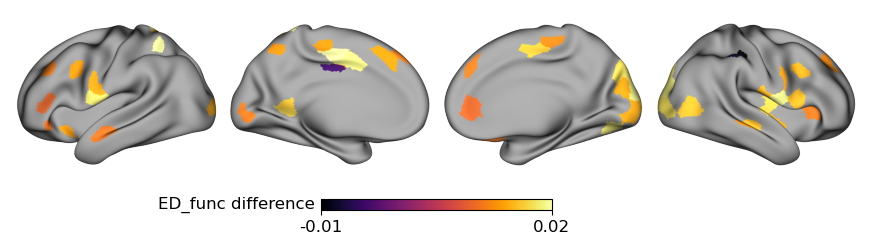

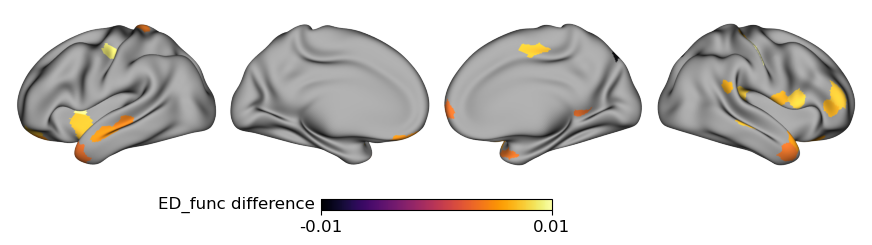

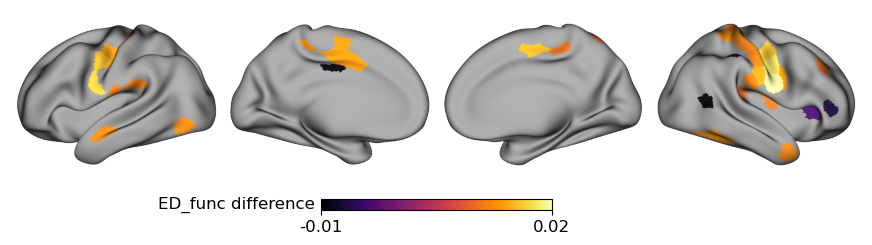

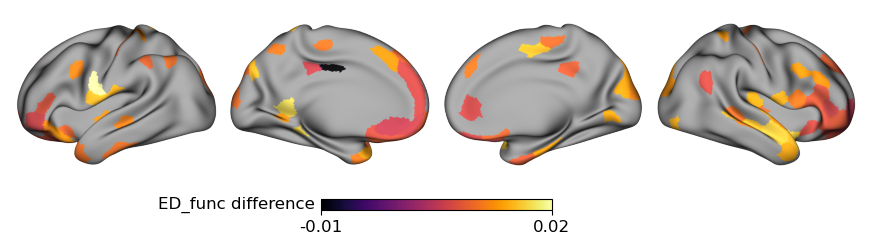

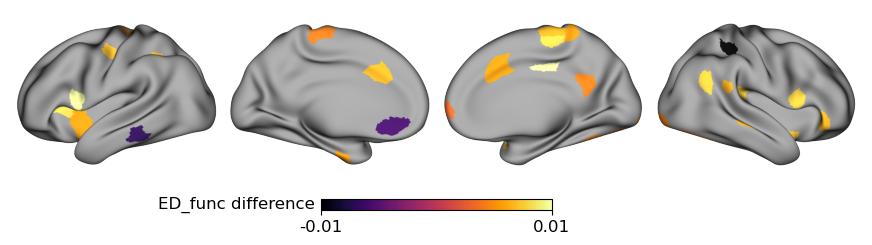

In [14]:
#1D ed func

edfunc1d = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/edfuncbefore_1d.mat')
g1=edfunc1d['g1']
g1_mesh = map_to_labels(np.squeeze(g1), labeling, mask=labeling != 0, fill=np.nan)
g2=edfunc1d['g2']
g2_mesh = map_to_labels(np.squeeze(g2), labeling, mask=labeling != 0, fill=np.nan)
g3=edfunc1d['g3']
g3_mesh = map_to_labels(np.squeeze(g3), labeling, mask=labeling != 0, fill=np.nan)


p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(g1_mesh*-1, cbar=True, cmap='inferno',cbar_label='ED_func difference' )
kws = {'location': 'bottom', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, }
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/edfunc1d_g1_before.svg')

p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(g2_mesh*-1, cbar=True, cmap='inferno',cbar_label='ED_func difference' )
kws = {'location': 'bottom', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, }
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/edfunc1d_g2_before.svg')

p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(g3_mesh*-1, cbar=True, cmap='inferno',cbar_label='ED_func difference' )
kws = {'location': 'bottom', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, }
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/edfunc1d_g3_before.svg')

#1D ed func

edfunc1d = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/edfuncafter_1d.mat')
g1=edfunc1d['g1']
g1_mesh = map_to_labels(np.squeeze(g1), labeling, mask=labeling != 0, fill=np.nan)
g2=edfunc1d['g2']
g2_mesh = map_to_labels(np.squeeze(g2), labeling, mask=labeling != 0, fill=np.nan)
g3=edfunc1d['g3']
g3_mesh = map_to_labels(np.squeeze(g3), labeling, mask=labeling != 0, fill=np.nan)


p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(g1_mesh*-1, cbar=True, cmap='inferno',cbar_label='ED_func difference' )
kws = {'location': 'bottom', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, }
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/edfunc1d_g1_after.svg')

p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(g2_mesh*-1, cbar=True, cmap='inferno',cbar_label='ED_func difference' )
kws = {'location': 'bottom', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, }
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/edfunc1d_g2_after.svg')

p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(g3_mesh*-1, cbar=True, cmap='inferno',cbar_label='ED_func difference' )
kws = {'location': 'bottom', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, }
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/edfunc1d_g3_after.svg')


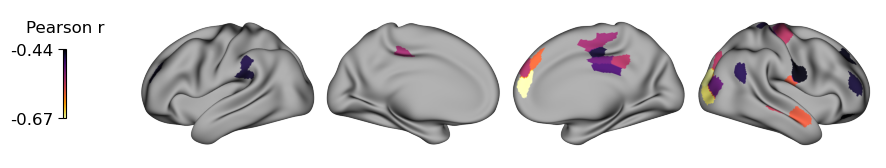

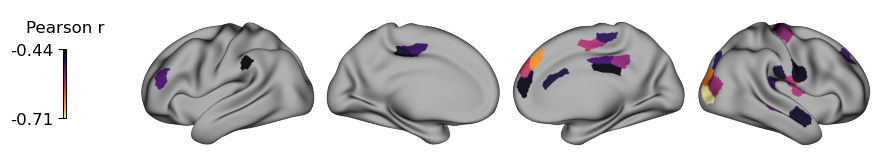

In [5]:
behs = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/behs_all.mat')
beh2sig_before=behs['beh2_before_fdr'][:,0]
beh2sig_before_mesh = map_to_labels(np.squeeze(beh2sig_before), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(beh2sig_before_mesh, cbar=True, cmap='inferno_r',cbar_label='Pearson r' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, }
fig = p.build(cbar_kws=kws)
#fig.savefig('/home/koba/Desktop/Stroke/figures/revision/beh_2_fdr_before.svg')


beh2sig_after=behs['beh2_after_fdr'][:,0]
beh2sig_after_mesh = map_to_labels(np.squeeze(beh2sig_after), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(beh2sig_after_mesh, cbar=True, cmap='inferno_r',cbar_label='Pearson r' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, }
fig = p.build(cbar_kws=kws)
#fig.savefig('/home/koba/Desktop/Stroke/figures/revision/beh_2_fdr_after.svg')



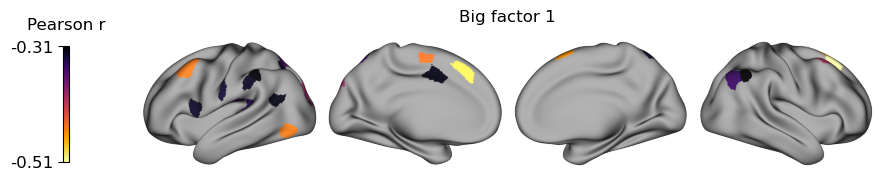

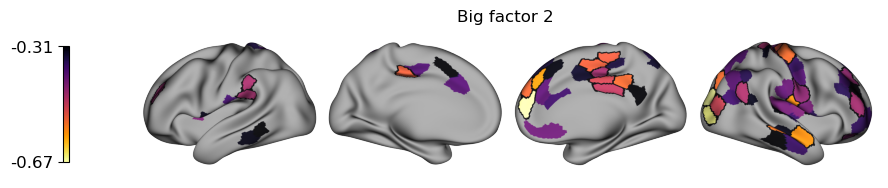

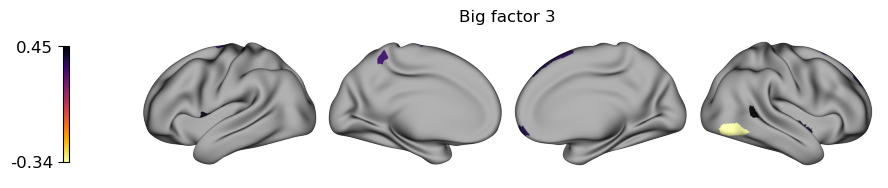

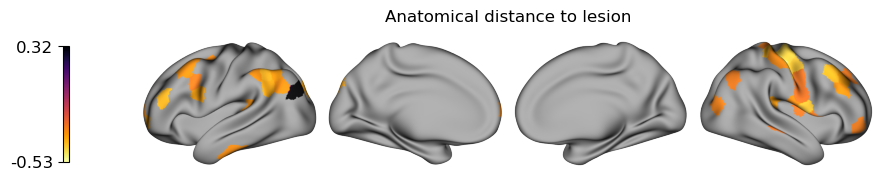

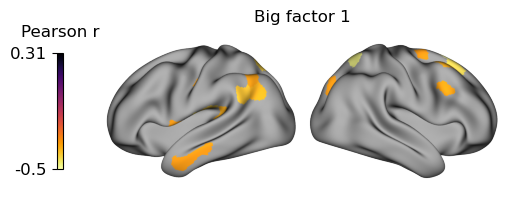

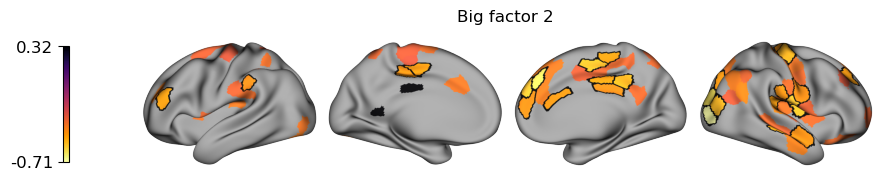

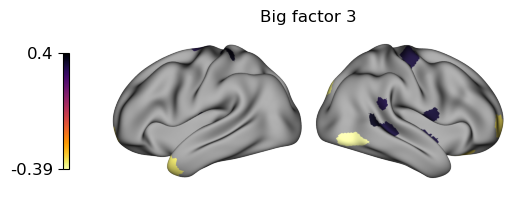

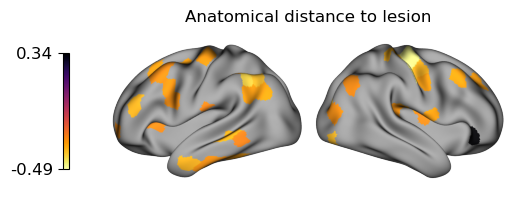

In [13]:
beh1=behs['beh1_before'][:,0]
beh1_mesh = map_to_labels(np.squeeze(beh1), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(beh1_mesh, cbar=True, cmap='inferno_r',cbar_label='Pearson r' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12,'shrink':0.5  }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Big factor 1')
#fig.savefig('/home/koba/Desktop/Stroke/figures/revision/beh_1_before.svg')

beh2=behs['beh2_before'][:,0]
beh2_mesh = map_to_labels(np.squeeze(beh2), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(beh2_mesh, cbar=True, cmap='inferno_r',cbar_label='' )
p.add_layer(beh2sig_before_mesh, cbar=False, cmap='inferno_r',as_outline=True,)
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, 'shrink':0.5 }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Big factor 2 ')
#fig.savefig('/home/koba/Desktop/Stroke/figures/revision/beh_2_before.svg')

beh3=behs['beh3_before'][:,0]
beh3_mesh = map_to_labels(np.squeeze(beh3), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(beh3_mesh, cbar=True, cmap='inferno_r',cbar_label='' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, 'shrink':0.5 }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Big factor 3')
#fig.savefig('/home/koba/Desktop/Stroke/figures/revision/beh_3_before.svg')

beh4=behs['anat_before'][:,0]
beh4_mesh = map_to_labels(np.squeeze(beh4), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(beh4_mesh, cbar=True, cmap='inferno_r',cbar_label='' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, 'shrink':0.5 }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Anatomical distance to lesion')
#fig.savefig('/home/koba/Desktop/Stroke/figures/revision/anat_before.svg')


beh1=behs['beh1_after'][:,0]
beh1_mesh = map_to_labels(np.squeeze(beh1), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,views='lateral',size=(500, 200),zoom=1.5,mirror_views=True)
p.add_layer(beh1_mesh, cbar=True, cmap='inferno_r',cbar_label='Pearson r' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12,'shrink':0.5  }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Big factor 1')
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/beh_1_after.svg')

beh2=behs['beh2_after'][:,0]
beh2_mesh = map_to_labels(np.squeeze(beh2), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,layout='row',size=(1000, 200),zoom=1.5,mirror_views=True)
p.add_layer(beh2_mesh, cbar=True, cmap='inferno_r',cbar_label='' )
p.add_layer(beh2sig_after_mesh, cbar=False, cmap='Greys',as_outline=True,)
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12,'shrink':0.5  }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Big factor 2 ')
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/beh_2_after.svg')

beh3=behs['beh3_after'][:,0]
beh3_mesh = map_to_labels(np.squeeze(beh3), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,views='lateral',size=(500, 200),zoom=1.5,mirror_views=True)
p.add_layer(beh3_mesh, cbar=True, cmap='inferno_r',cbar_label='' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, 'shrink':0.5 }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Big factor 3')
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/beh_3_after.svg')

beh4=behs['anat_after'][:,0]
beh4_mesh = map_to_labels(np.squeeze(beh4), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,views='lateral',size=(500, 200),zoom=1.5,mirror_views=True)
p.add_layer(beh4_mesh, cbar=True, cmap='inferno_r',cbar_label='' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12,'shrink':0.5  }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Anatomical distance to lesion')
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/anat_after.svg')



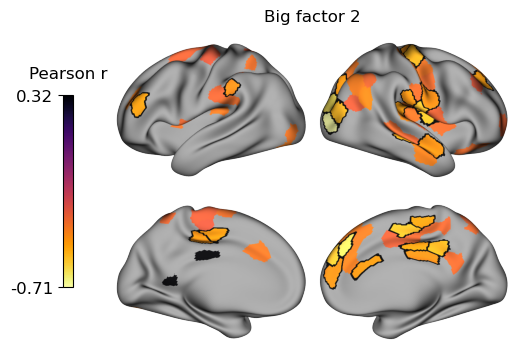

In [27]:
beh2=behs['beh2_after'][:,0]
beh2_mesh = map_to_labels(np.squeeze(beh2), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,zoom=1.5,mirror_views=True)
p.add_layer(beh2_mesh, cbar=True, cmap='inferno_r',cbar_label='Pearson r' )
p.add_layer(beh2sig_after_mesh, cbar=False, cmap='Greys',as_outline=True,)
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12,'shrink':0.5  }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('Big factor 2')
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/beh_2_after.svg')


In [6]:
hemis = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/intrahemi.mat')
right_control_before=hemis['right_control_all_before'].mean(axis=1)
right_control_after=hemis['right_control_all_after'].mean(axis=1)
left_control_before=hemis['left_control_all_before'].mean(axis=1)
left_control_after=hemis['left_control_all_after'].mean(axis=1)

right_intact_before=hemis['right_intact_before'].mean(axis=1)
right_intact_after=hemis['right_intact_after'].mean(axis=1)
left_damaged_before=hemis['left_damaged_before'].mean(axis=1)
left_damaged_after=hemis['left_damaged_after'].mean(axis=1)

right_damaged_before=hemis['right_damaged_before'].mean(axis=1)
right_damaged_after=hemis['right_damaged_after'].mean(axis=1)
left_intact_before=hemis['left_intact_before'].mean(axis=1)
left_intact_after=hemis['left_intact_after'].mean(axis=1)

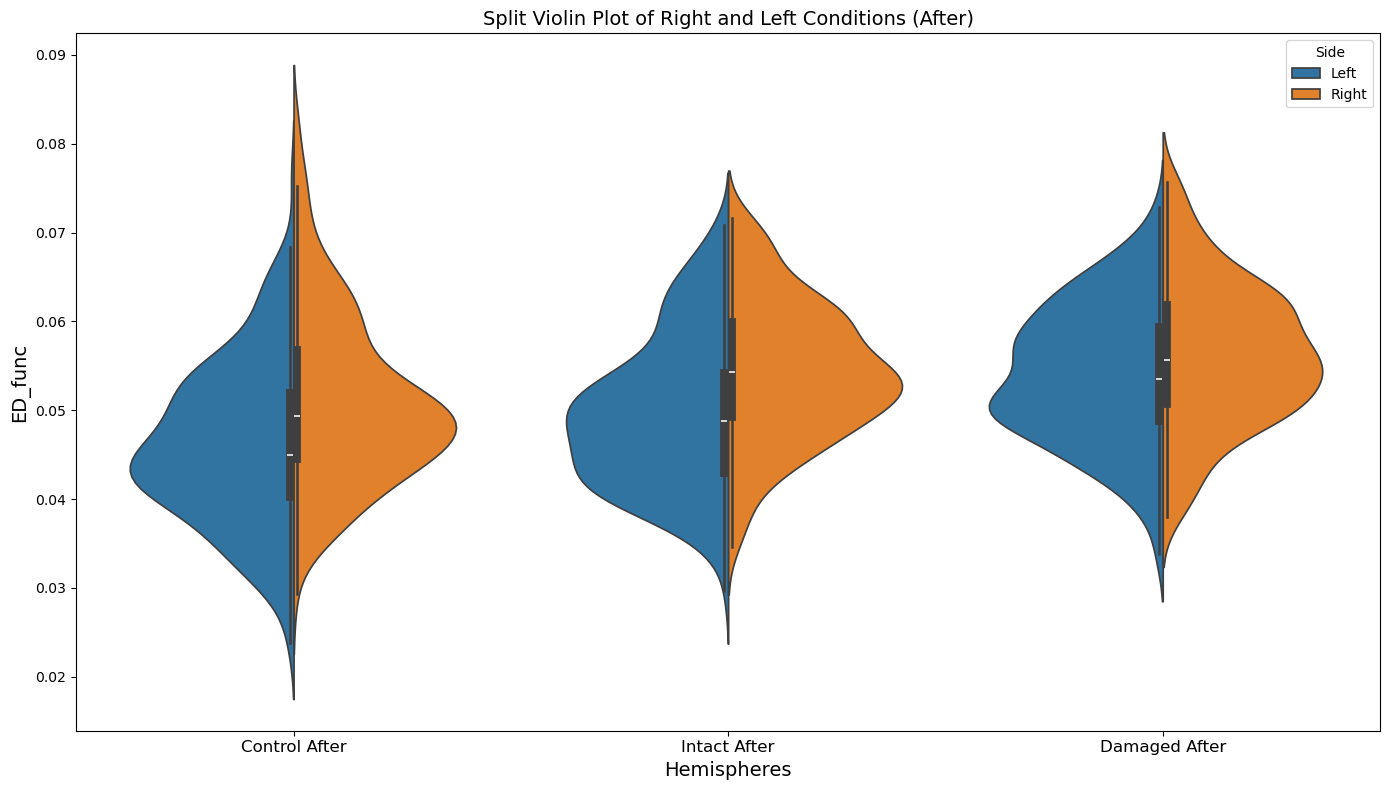

In [6]:
data = {
    'Right Control After': right_control_after,
    'Left Control After': left_control_after,
    'Right Intact After': right_intact_after,
    'Left Intact After': left_intact_after,
    'Right Damaged After': right_damaged_after,
    'Left Damaged After': left_damaged_after
}

# Filter data into 'Right' and 'Left'
data_right = {k: v for k, v in data.items() if 'Right' in k}
data_left = {k: v for k, v in data.items() if 'Left' in k}

# Convert dictionaries to DataFrames
df_right = pd.DataFrame(dict([(k.replace('Right ', ''), pd.Series(v)) for k, v in data_right.items()]))
df_left = pd.DataFrame(dict([(k.replace('Left ', ''), pd.Series(v)) for k, v in data_left.items()]))

# Melt the DataFrames to long format for seaborn
df_melted_right = df_right.melt(var_name='Condition', value_name='Values')
df_melted_left = df_left.melt(var_name='Condition', value_name='Values')

# Create a combined DataFrame with an additional 'Side' column
df_melted_right['Side'] = 'Right'  # Flip sides here
df_melted_left['Side'] = 'Left'  # Flip sides here
df_combined = pd.concat([df_melted_left,df_melted_right])

# Plot the split violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Condition', y='Values', hue='Side', data=df_combined, split=True, hue_order=['Left', 'Right'])  # Adjust hue_order to flip sides
#plt.scatter(2,np.hstack([right_control_after,left_control_after]).mean(), s=20, c="purple")

plt.xticks(rotation=0, fontsize=12)  # Set labels horizontal and increase font size
plt.ylabel('ED_func', fontsize=14)  # Increase the font size of the y-axis label
plt.xlabel('Hemispheres', fontsize=14)  # Increase the font size of the y-axis label

plt.title('Split Violin Plot of Right and Left Conditions (After)', fontsize=14)
plt.tight_layout()
plt.savefig('/home/koba/Desktop/Stroke/figures/revision/laterality.svg')
plt.show()


In [19]:
import numpy as np
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
t_stat, p_value = ttest_rel(np.hstack([left_intact_after,right_intact_after]),np.hstack([left_damaged_before,right_damaged_before]))

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -4.5060
P-value: 0.0000


In [34]:
dif1=(left_control_after-right_control_after)
dif2=(left_control_before-right_control_before)

t_stat, p_value = ttest_1samp(dif1,0)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -5.5090
P-value: 0.0000


In [159]:
lat_damaged_before

5.755640683055563e-05

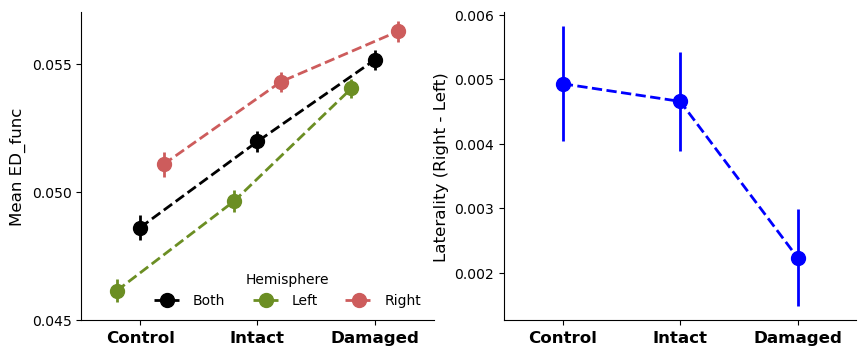

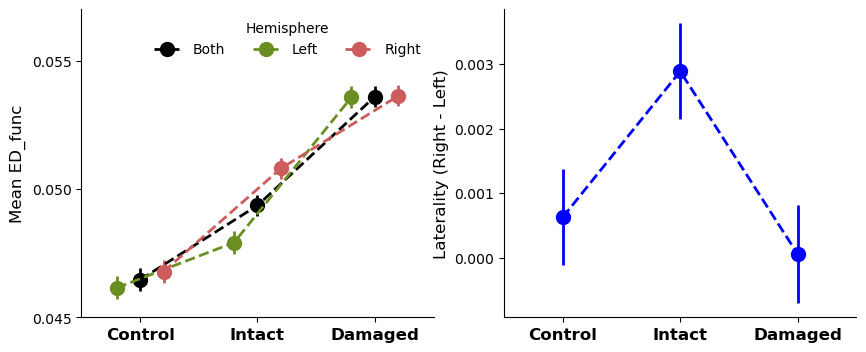

In [5]:
import scipy
import numpy as np
import matplotlib.pylab as plt

hemis = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/intrahemi.mat')
# After lag correction
right_control_after=hemis['right_control_all_after'].mean(axis=1)
left_control_after=hemis['left_control_all_after'].mean(axis=1)
right_intact_after=hemis['right_intact_after'].mean(axis=1)
left_damaged_after=hemis['left_damaged_after'].mean(axis=1)
left_intact_after=hemis['left_intact_after'].mean(axis=1)
right_damaged_after=hemis['right_damaged_after'].mean(axis=1)
control_after = np.hstack([left_control_after,right_control_after])
intact_after = np.hstack([left_intact_after,right_intact_after])
damaged_after = np.hstack([left_damaged_after,right_damaged_after])
lat_control_after = right_control_after- left_control_after
lat_intact_after = right_intact_after - left_intact_after
lat_damaged_after = right_damaged_after - left_damaged_after
error_all_after=np.array([control_after.std(),intact_after.std(),damaged_after.std()])/np.sqrt(control_after.shape)
error_left_after=np.array([left_control_after.std(),left_intact_after.std(),left_damaged_after.std()])/np.sqrt(control_after.shape)
error_right_after=np.array([right_control_after.std(),right_intact_after.std(),right_damaged_after.std()])/np.sqrt(control_after.shape)
error_lat_after=np.array([lat_control_after.std(), lat_intact_after.std(), lat_damaged_after.std()] )/np.sqrt(lat_control_after.shape)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.errorbar([1,2,3],[control_after.mean(),intact_after.mean(),damaged_after.mean()],yerr=error_all_after,fmt='--o', linewidth=2, markersize=10, color='black', label="Both")
ax1.errorbar([0.8,1.8,2.8],[left_control_after.mean(),left_intact_after.mean(),left_damaged_after.mean()],yerr=error_left_after,fmt='--o', linewidth=2, markersize=10, color='olivedrab', label="Left")
ax1.errorbar([1.2,2.2,3.2],[right_control_after.mean(),right_intact_after.mean(),right_damaged_after.mean()],yerr=error_right_after,fmt='--o', linewidth=2, markersize=10, color='indianred', label="Right")
ax1.set_xticks([1,2,3])
ax1.set_xticklabels(["Control", "Intact", "Damaged"], fontweight='bold', fontsize=12)
ax1.set_xlim([0.5,3.5])
ax1.spines[["top","right"]].set_visible(False)
ax1.legend(frameon=False, title="Hemisphere", ncols=3)
ax1.set_ylabel("Mean ED_func", fontsize=12)
ax1.set_ylim([0.045,0.057])
ax1.set_yticks([0.045,0.050,0.055])

ax2.errorbar([1,2,3],[lat_control_after.mean(),lat_intact_after.mean(),lat_damaged_after.mean()],yerr=error_lat_after,fmt='--o', linewidth=2, markersize=10, color='blue')
ax2.set_xticks([1,2,3])
ax2.set_xticklabels(["Control", "Intact", "Damaged"], fontweight='bold', fontsize=12)
ax2.set_xlim([0.5,3.5])
ax2.spines[["top","right"]].set_visible(False)
ax2.set_ylabel("Laterality (Right - Left)", fontsize=12)
#ax2.set_ylim([0,0.0031])
#ax2.set_yticks([0,0.001,0.002,0.003])
plt.savefig("/home/koba/Desktop/Stroke/figures/revision/Laterality-after.svg", dpi=400, format='svg')

right_control_before=hemis['right_control_all_before'].mean(axis=1)
left_control_before=hemis['left_control_all_before'].mean(axis=1)
right_intact_before=hemis['right_intact_before'].mean(axis=1)
left_damaged_before=hemis['left_damaged_before'].mean(axis=1)
left_intact_before=hemis['left_intact_before'].mean(axis=1)
right_damaged_before=hemis['right_damaged_before'].mean(axis=1)
control_before = np.hstack([left_control_before,right_control_before])
intact_before = np.hstack([left_intact_before,right_intact_before])
damaged_before = np.hstack([left_damaged_before,right_damaged_before])
lat_control_before = right_control_before- left_control_before
lat_intact_before = right_intact_before - left_intact_before
lat_damaged_before = right_damaged_before - left_damaged_before
error_all_before=np.array([control_before.std(),intact_before.std(),damaged_before.std()])/np.sqrt(control_before.shape)
error_left_before=np.array([left_control_before.std(),left_intact_before.std(),left_damaged_before.std()])/np.sqrt(control_before.shape)
error_right_before=np.array([right_control_before.std(),right_intact_before.std(),right_damaged_before.std()])/np.sqrt(control_before.shape)
error_lat_before=np.array([lat_control_before.std(), lat_intact_before.std(), lat_damaged_before.std()] )/np.sqrt(lat_control_before.shape)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.errorbar([1,2,3],[control_before.mean(),intact_before.mean(),damaged_before.mean()],yerr=error_all_before,fmt='--o', linewidth=2, markersize=10, color='black', label="Both")
ax1.errorbar([0.8,1.8,2.8],[left_control_before.mean(),left_intact_before.mean(),left_damaged_before.mean()],yerr=error_left_before,fmt='--o', linewidth=2, markersize=10, color='olivedrab', label="Left")
ax1.errorbar([1.2,2.2,3.2],[right_control_before.mean(),right_intact_before.mean(),right_damaged_before.mean()],yerr=error_right_before,fmt='--o', linewidth=2, markersize=10, color='indianred', label="Right")
ax1.set_xticks([1,2,3])
ax1.set_xticklabels(["Control", "Intact", "Damaged"], fontweight='bold', fontsize=12)
ax1.set_xlim([0.5,3.5])
ax1.spines[["top","right"]].set_visible(False)
ax1.legend(frameon=False, title="Hemisphere", ncols=3)
ax1.set_ylabel("Mean ED_func", fontsize=12)
ax1.set_ylim([0.045,0.057])
ax1.set_yticks([0.045,0.050,0.055])

ax2.errorbar([1,2,3],[lat_control_before.mean(),lat_intact_before.mean(),lat_damaged_before.mean()],yerr=error_lat_before,fmt='--o', linewidth=2, markersize=10, color='blue')
ax2.set_xticks([1,2,3])
ax2.set_xticklabels(["Control", "Intact", "Damaged"], fontweight='bold', fontsize=12)
ax2.set_xlim([0.5,3.5])
ax2.spines[["top","right"]].set_visible(False)
ax2.set_ylabel("Laterality (Right - Left)", fontsize=12)
#ax2.set_ylim([0,0.0031])
#ax2.set_yticks([0,0.001,0.002,0.003])
plt.savefig("/home/koba/Desktop/Stroke/figures/revision/Laterality-before.svg", dpi=400, format='svg')



In [40]:
damaged_after.shape

(400,)

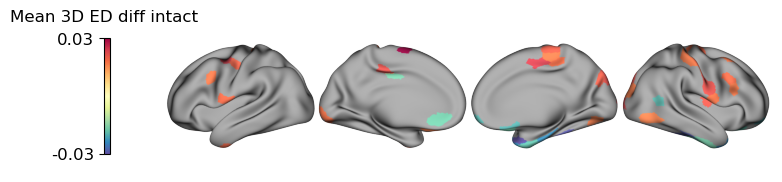

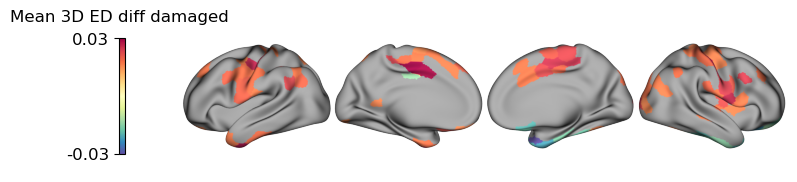

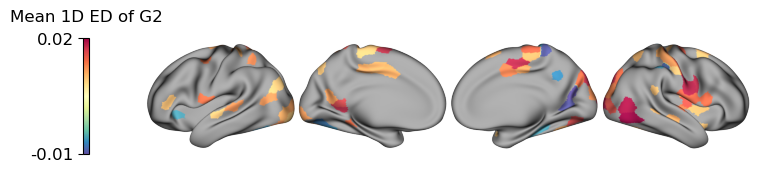

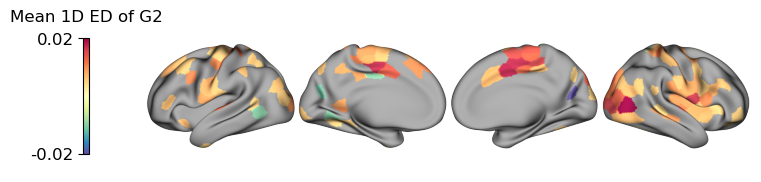

In [15]:

# For poster
control_after=np.hstack([left_control_after,right_control_after])
intact_after=np.hstack([left_intact_after,right_intact_after])
damaged_after=np.hstack([left_damaged_after,right_damaged_after])

dif1=intact_after-control_after
dif2=damaged_after-control_after

intact3d_mesh = map_to_labels(np.squeeze((dif1*(np.absolute(dif1)>0.015))), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,layout='row',size=(800, 200),zoom=1.25,mirror_views=True)
p.add_layer(intact3d_mesh, cbar=True, cmap='Spectral_r',cbar_label='Mean 3D ED diff intact '  )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12,'shrink':.5  }
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/intact_3d.svg')

intact3d_mesh = map_to_labels(np.squeeze((dif2*(np.absolute(dif2)>0.015))), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,layout='row',size=(800, 200),zoom=1.25,mirror_views=True)
p.add_layer(intact3d_mesh, cbar=True, cmap='Spectral_r',cbar_label='Mean 3D ED diff damaged '  )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12,'shrink':.5  }
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/damaged_3d.svg')


intrahemi_1d = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/1d_dist.mat')

dif1=intrahemi_1d['intactd1d_after']-intrahemi_1d['control_1d']
dif2=intrahemi_1d['damaged1d_after']-intrahemi_1d['control_1d']

intact3d_mesh = map_to_labels(np.squeeze((dif1*(np.absolute(dif1)>0.007))), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,layout='row',size=(800, 200),zoom=1.25,mirror_views=True)
p.add_layer(intact3d_mesh, cbar=True, cmap='Spectral_r',cbar_label='Mean 1D ED of G2', )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12,'shrink':.5   }
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/intact_1d.svg')

intact3d_mesh = map_to_labels(np.squeeze((dif2*(np.absolute(dif2)>0.007))), labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,layout='row',size=(800, 200),zoom=1.25,mirror_views=True)
p.add_layer(intact3d_mesh, cbar=True, cmap='Spectral_r',cbar_label='Mean 1D ED of G2', )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12, 'shrink':.5  }
fig = p.build(cbar_kws=kws)
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/damaged_1d.svg')

(0.04, 0.06)

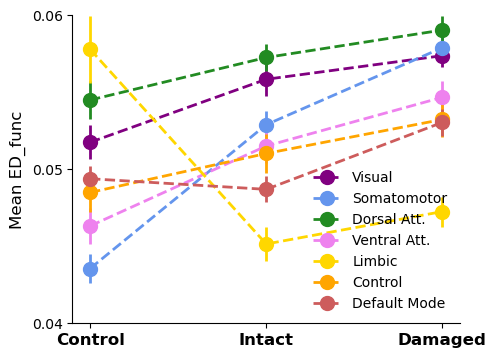

In [8]:
hemis = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/hemispheres_decomposition.mat')

means=hemis['means']
stds=hemis['std']

fig,ax=plt.subplots(1,1,figsize=(5,4))
plt.errorbar([1,2,3],means[0,:],yerr=stds[0,:],fmt='--o', linewidth=2, markersize=10, color='purple', label="Visual", alpha=1)
plt.errorbar([1,2,3],means[1,:],yerr=stds[1,:],fmt='--o', linewidth=2, markersize=10, color='cornflowerblue', label="Somatomotor")
plt.errorbar([1,2,3],means[2,:],yerr=stds[2,:],fmt='--o', linewidth=2, markersize=10, color='forestgreen', label="Dorsal Att.",alpha=1)
plt.errorbar([1,2,3],means[3,:],yerr=stds[3,:],fmt='--o', linewidth=2, markersize=10, color='violet', label="Ventral Att.",alpha=1)
plt.errorbar([1,2,3],means[4,:],yerr=stds[4,:],fmt='--o', linewidth=2, markersize=10, color='gold', label="Limbic")
plt.errorbar([1,2,3],means[5,:],yerr=stds[5,:],fmt='--o', linewidth=2, markersize=10, color='orange', label="Control",alpha=1)
plt.errorbar([1,2,3],means[6,:],yerr=stds[6,:],fmt='--o', linewidth=2, markersize=10, color='indianred', label="Default Mode",alpha=1)
ax.set_xticks([1,2,3])
ax.set_xticklabels(["Control", "Intact", "Damaged"], fontweight='bold', fontsize=12)
ax.spines[["top","right"]].set_visible(False)
ax.legend(frameon=False,ncols=1)
ax.set_ylabel("Mean ED_func", fontsize=12)
ax.set_yticks([0.04,0.05,0.06])
ax.set_ylim([0.04,0.06])
#plt.savefig("/home/koba/Desktop/Stroke/figures/revision/hemis_decomposition.svg", dpi=400, format='svg')

In [75]:
t_stat, p_value = ttest_ind(np.hstack([left_intact_after,right_intact_after]),np.hstack([left_control_after,right_control_after]))

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 5.2278
P-value: 0.0000


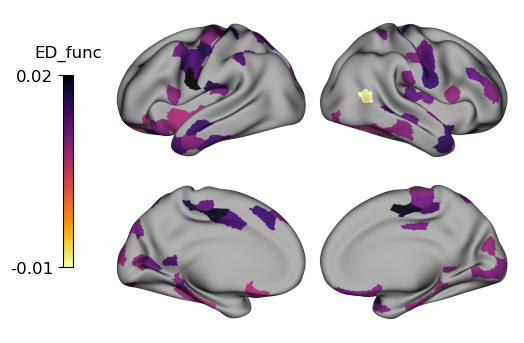

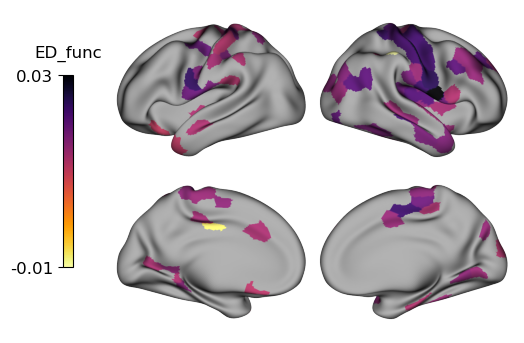

In [11]:
hemi = scipy.io.loadmat('/home/koba/Desktop/stroke_mat/damage_on_separate_hemi.mat')

left=hemi['damage_on_left'][:,0]
left2_mesh = map_to_labels(np.squeeze(left)*-1, labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,zoom=1.5,mirror_views=True)
p.add_layer(left2_mesh, cbar=True, cmap='inferno_r',cbar_label='ED_func' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12,'shrink':0.5  }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('')
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/sep_ed_left.svg')

right=hemi['damage_on_right'][:,0]
right2_mesh = map_to_labels(np.squeeze(right)*-1, labeling, mask=labeling != 0, fill=np.nan)
p = Plot(lh, rh,zoom=1.5,mirror_views=True)
p.add_layer(right2_mesh, cbar=True, cmap='inferno_r',cbar_label='ED_func' )
kws = {'location': 'left', 'label_direction': 0, 'n_ticks': 2, 'fontsize': 12,'shrink':0.5  }
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title('')
fig.savefig('/home/koba/Desktop/Stroke/figures/revision/sep_ed_right.svg')